<a href="https://colab.research.google.com/github/RumeysaCeylan/ImageClassification/blob/main/resnet50__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications.resnet50 import ResNet50



from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm

import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb



from keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
IMAGE_SIZE = [224, 224]
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [64]:
for layer in resnet.layers:
    layer.trainable = False

In [65]:
folders=glob("/content/drive/MyDrive/archive/Dataset/*")
folders

['/content/drive/MyDrive/archive/Dataset/Very_Mild_Demented',
 '/content/drive/MyDrive/archive/Dataset/Mild_Demented',
 '/content/drive/MyDrive/archive/Dataset/Moderate_Demented',
 '/content/drive/MyDrive/archive/Dataset/Non_Demented']

In [66]:
x = Flatten()(resnet.output)

In [67]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive/Dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')



valid_set = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/archive/validation',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 128)
     

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive/Test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 4143 images belonging to 4 classes.
Found 1103 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


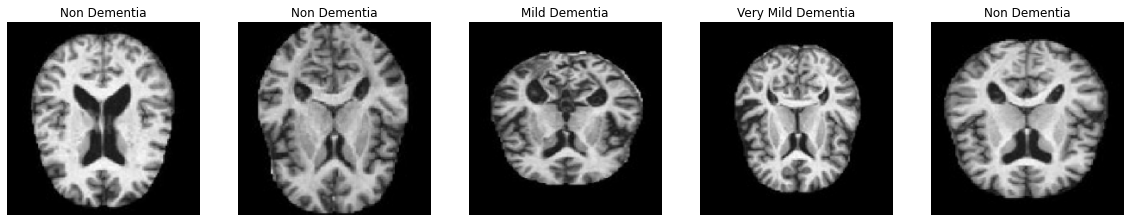

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(training_set))
    rand2 = np.random.randint(100)
    ax[i].imshow(training_set[rand1][0][rand2])
    ax[i].axis('off')
    a = training_set[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Dementia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [68]:
prediction = Dense(len(folders), activation='softmax')(x)
 
# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [69]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [70]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [71]:
import tensorflow 

OPT    = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)


In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = '/content/drive/MyDrive/Colab Notebooks/best_weights__.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [74]:
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=150, #10,15,20
  callbacks=callback_list,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)


Epoch 1/150
33/33 [==============================] - ETA: 0s - loss: 3.1964 - auc: 0.6717
Epoch 1: val_auc improved from -inf to 0.72222, saving model to /content/drive/MyDrive/Colab Notebooks/best_weights__.hdf5
33/33 [==============================] - 61s 2s/step - loss: 3.1964 - auc: 0.6717 - val_loss: 1.7430 - val_auc: 0.7222
Epoch 2/150
33/33 [==============================] - ETA: 0s - loss: 1.0916 - auc: 0.7912
Epoch 2: val_auc improved from 0.72222 to 0.77682, saving model to /content/drive/MyDrive/Colab Notebooks/best_weights__.hdf5
33/33 [==============================] - 57s 2s/step - loss: 1.0916 - auc: 0.7912 - val_loss: 1.3468 - val_auc: 0.7768
Epoch 3/150
33/33 [==============================] - ETA: 0s - loss: 1.0225 - auc: 0.8090
Epoch 3: val_auc improved from 0.77682 to 0.78457, saving model to /content/drive/MyDrive/Colab Notebooks/best_weights__.hdf5
33/33 [==============================] - 56s 2s/step - loss: 1.0225 - auc: 0.8090 - val_loss: 1.0776 - val_auc: 0.784

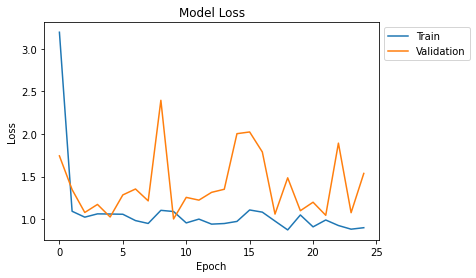

In [75]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()
     

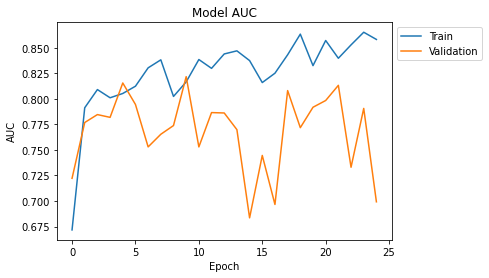

In [76]:
# Summarize history for loss

plt.plot(r.history['auc'])
plt.plot(r.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [77]:

# Evaluating Loss and AUC

model.evaluate(test_set)

11/11 [==============================] - 4s 359ms/step - loss: 1.9623 - auc: 0.5940


[1.9622714519500732, 0.5940276980400085]

1/1 [==============================] - 1s 809ms/step
49.87 % chances are there that the image is Non_Demented


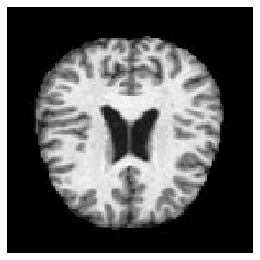

In [78]:
# Test Case 1: Non-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_105.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 30ms/step
58.34 % chances are there that the image is Non_Demented


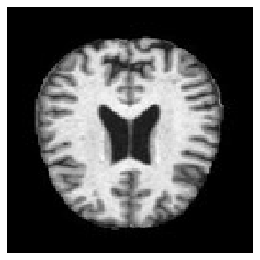

In [79]:
# Test Case 1: verymild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Very_Mild_Demented/verymild_112.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 28ms/step
59.54 % chances are there that the image is Non_Demented


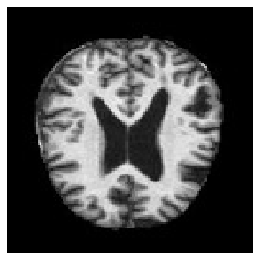

In [80]:
# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_128.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 32ms/step
95.86 % chances are there that the image is Moderate_Demented


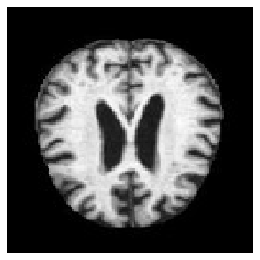

In [81]:
# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Mild_Demented/mild_113.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 30ms/step
65.48 % chances are there that the image is Non_Demented


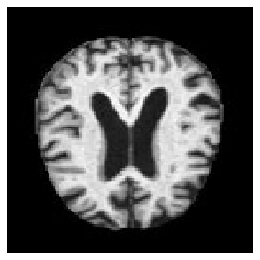

In [82]:
# Test Case 1: mild-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Mild_Demented/mild.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 27ms/step
41.92 % chances are there that the image is Non_Demented


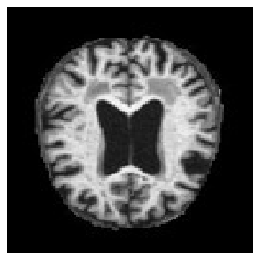

In [83]:

# Test Case 1_1: Non-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_103.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 31ms/step
52.93 % chances are there that the image is Moderate_Demented


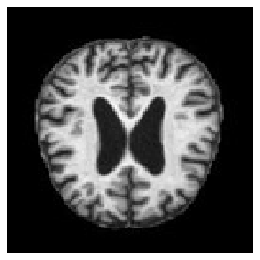

In [84]:

# Test Case 1_1: Non-Dementia

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/drive/MyDrive/archive/Test/Non_Demented/non_150.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
#answer = model.predict_classes(img)
answer = np.argmax(model.predict(img), axis=1)
#probability = round(np.max(model.predict_proba(img)*100),2)
probability=round(np.max(model.predict_on_batch(img)*100),2)
print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 30ms/step
96.91 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 22ms/step
90.39 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 22ms/step
81.9 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 22ms/step
92.99 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 23ms/step
35.8 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 22ms/step
42.73 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 22ms/step
91.51 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 27ms/step
86.14 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 21ms/step
66.14 % chances are there that the ima

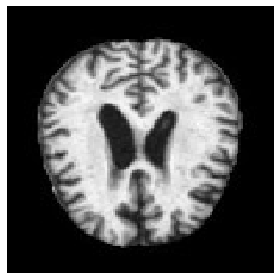

In [85]:


import cv2
import glob 

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

for img_x in glob.glob("/content/drive/MyDrive/archive/Test/Moderate_Demented/*.jpg"):
  img = cv2.imread(img_x)
  img = load_img(img_x, target_size = (224,224,3))
  #img = load_img('/content/drive/MyDrive/Colab Notebooks/archive_y/OriginalDataset/VeryMildDemented/verymildDem430.jpg', target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  imshow(img)
  plt.axis('off')
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  print(probability, '% chances are there that the image is',idc[answer[0]])

In [86]:

# MODERATE 

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img_num = 0
correct_num = 0

for img_x in glob.glob("/content/drive/MyDrive/archive/Test/Moderate_Demented/*.jpg"):
  img_num += 1
  img = load_img(img_x, target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  if(idc[answer[0]] == "Moderate_Demented"):
    correct_num +=1
print("correct: "+str(correct_num))
print("images: "+str(img_num))
print("percentage: "+str(correct_num/img_num))

1/1 [==============================] - 0s 20ms/step
correct: 12
images: 13
percentage: 0.9230769230769231


1/1 [==============================] - 0s 30ms/step
51.57 % chances are there that the image is Non_Demented
1/1 [==============================] - 0s 21ms/step
55.45 % chances are there that the image is Very_Mild_Demented
1/1 [==============================] - 0s 21ms/step
41.92 % chances are there that the image is Non_Demented
1/1 [==============================] - 0s 21ms/step
49.87 % chances are there that the image is Non_Demented
1/1 [==============================] - 0s 20ms/step
50.97 % chances are there that the image is Very_Mild_Demented
1/1 [==============================] - 0s 22ms/step
66.5 % chances are there that the image is Non_Demented
1/1 [==============================] - 0s 47ms/step
50.55 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 26ms/step
73.17 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 24ms/step
56.61 % chances are there that the image is Non_Demente

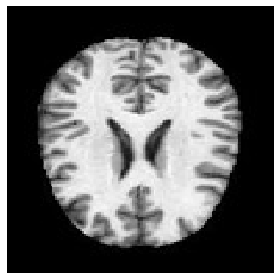

In [90]:

import cv2
import glob 

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

for img_x in glob.glob("/content/drive/MyDrive/archive/Test/Non_Demented/*.jpg"):
  img = cv2.imread(img_x)
  img = load_img(img_x, target_size = (224,224,3))
  #img = load_img('/content/drive/MyDrive/Colab Notebooks/archive_y/OriginalDataset/VeryMildDemented/verymildDem430.jpg', target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  imshow(img)
  plt.axis('off')
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  print(probability, '% chances are there that the image is',idc[answer[0]])

In [91]:

# MODERATE 

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img_num = 0
correct_num = 0

for img_x in glob.glob("/content/drive/MyDrive/archive/Test/Non_Demented/*.jpg"):
  img_num += 1
  img = load_img(img_x, target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  if(idc[answer[0]] == "Moderate_Demented"):
    correct_num +=1
print("correct: "+str(correct_num))
print("images: "+str(img_num))
print("percentage: "+str(correct_num/img_num))

1/1 [==============================] - 0s 22ms/step
correct: 287
images: 640
percentage: 0.4484375


1/1 [==============================] - 0s 29ms/step
59.95 % chances are there that the image is Mild_Demented
1/1 [==============================] - 0s 22ms/step
99.12 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 21ms/step
79.89 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 20ms/step
42.45 % chances are there that the image is Non_Demented
1/1 [==============================] - 0s 28ms/step
54.15 % chances are there that the image is Non_Demented
1/1 [==============================] - 0s 21ms/step
37.05 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 21ms/step
60.18 % chances are there that the image is Mild_Demented
1/1 [==============================] - 0s 20ms/step
99.73 % chances are there that the image is Moderate_Demented
1/1 [==============================] - 0s 23ms/step
98.82 % chances are there that the image is Moderate_D

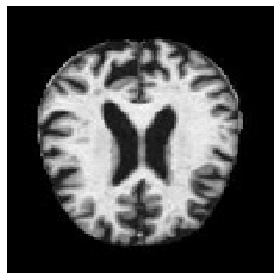

In [87]:

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

for img_x in glob.glob("/content/drive/MyDrive/archive/Test/Mild_Demented/*.jpg"):
  img = cv2.imread(img_x)
  img = load_img(img_x, target_size = (224,224,3))
  #img = load_img('/content/drive/MyDrive/Colab Notebooks/archive_y/OriginalDataset/VeryMildDemented/verymildDem430.jpg', target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  imshow(img)
  plt.axis('off')
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  print(probability, '% chances are there that the image is',idc[answer[0]])

In [92]:

# MODERATE 

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img_num = 0
correct_num = 0

for img_x in glob.glob("/content/drive/MyDrive/archive/Test/Very_Mild_Demented/*.jpg"):
  img_num += 1
  img = load_img(img_x, target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  if(idc[answer[0]] == "Moderate_Demented"):
    correct_num +=1
print("correct: "+str(correct_num))
print("images: "+str(img_num))
print("percentage: "+str(correct_num/img_num))

1/1 [==============================] - 0s 23ms/step
correct: 237
images: 448
percentage: 0.5290178571428571


In [88]:
# MILD

dic = test_set.class_indices
idc = {k:v for v, k in dic.items()}

img_num = 0
correct_num = 0

for img_x in glob.glob("/content/drive/MyDrive/archive/Test/Mild_Demented/*.jpg"):
  img_num += 1
  img = load_img(img_x, target_size = (224,224,3))
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img,axis=0)
  answer = np.argmax(model.predict(img), axis=1)
  probability=round(np.max(model.predict_on_batch(img)*100),2)
  if(idc[answer[0]] == "Mild_Demented"):
    correct_num +=1
print("correct: "+str(correct_num))
print("images: "+str(img_num))
print("percentage: "+str(correct_num/img_num))

1/1 [==============================] - 0s 20ms/step
correct: 13
images: 180
percentage: 0.07222222222222222


In [89]:
import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/MyDrive/archive/models/resnet50alzheimer.hdf5')